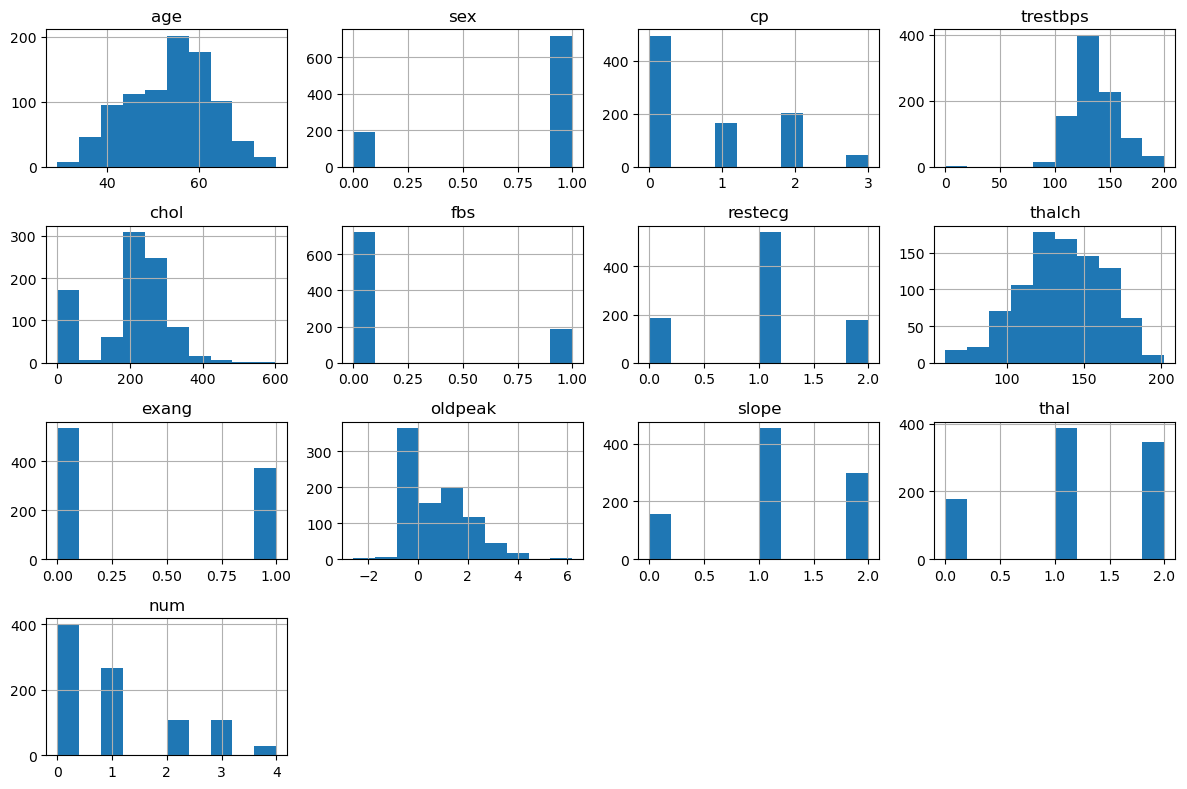

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.72      0.72        89
           1       0.38      0.38      0.38        48
           2       0.38      0.45      0.42        22
           3       0.11      0.12      0.11        17
           4       0.00      0.00      0.00         6

    accuracy                           0.52       182
   macro avg       0.32      0.33      0.33       182
weighted avg       0.51      0.52      0.51       182

Accuracy: 0.5164835164835165
Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}


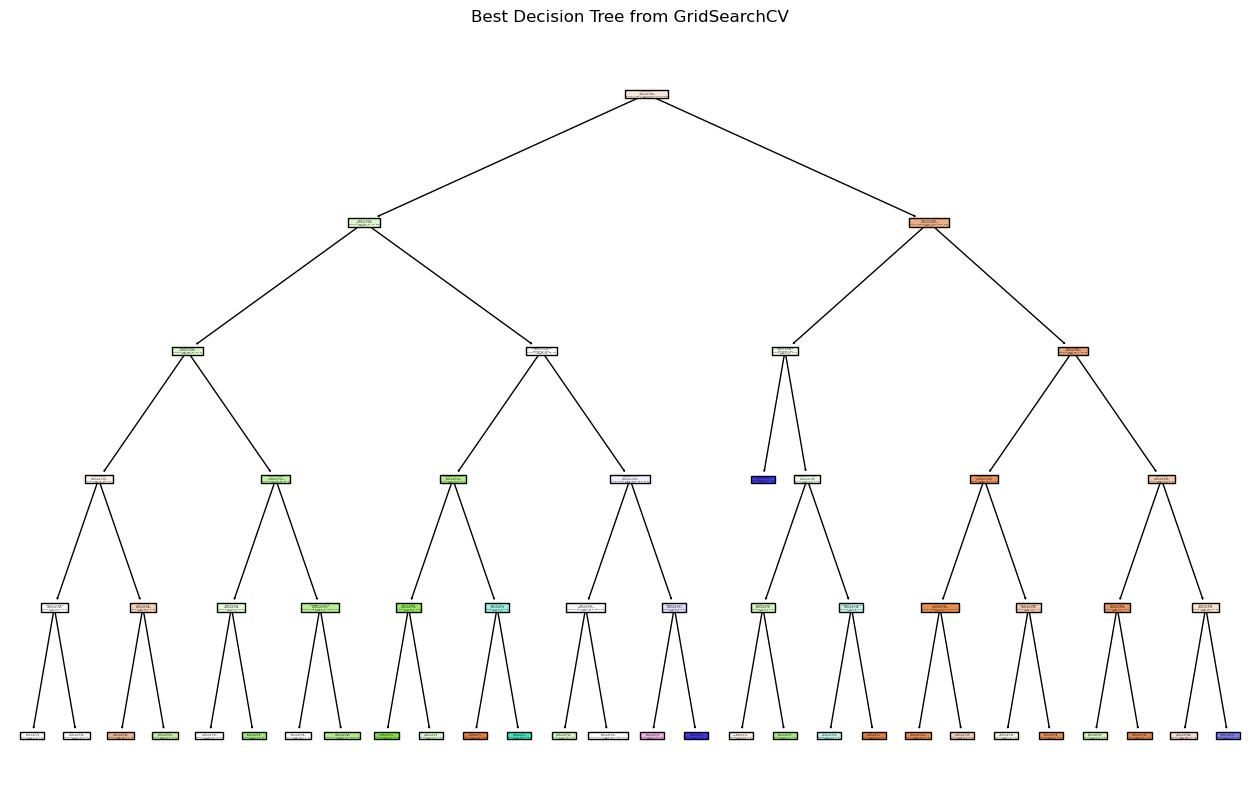

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score

# Load data from second sheet
file_path = r"D:\Data since couress\Completed\Decision Tree\heart_disease.xlsx"  # Update if needed
df = pd.read_excel(file_path, sheet_name=1)

# Clean problematic columns
df['fbs'] = df['fbs'].astype(str)
df['exang'] = df['exang'].astype(str).str.upper().replace({'TURE': 'TRUE', 'FALSE': 'FALSE'})

# List of categorical columns to encode
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# Encode using LabelEncoder
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Fill missing values (if any)
df.replace('?', np.nan, inplace=True)
df.fillna(df.mean(numeric_only=True), inplace=True)

# Visualize numeric columns
df.select_dtypes(include=["number"]).hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

# Feature-target split
X = df.drop(columns=["num"])
y = df["num"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Hyperparameter tuning
param_grid = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "criterion": ["gini", "entropy"]
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

# Visualize the best decision tree
best_model = grid_search.best_estimator_
plt.figure(figsize=(16, 10))
plot_tree(best_model, feature_names=X.columns, class_names=[str(i) for i in sorted(y.unique())], filled=True)
plt.title("Best Decision Tree from GridSearchCV")
plt.show()
